# Invasive Ductal Cancer

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

from PIL import Image, ImageDraw # encode into a bytesIO and #decode
from io import StringIO, BytesIO
import requests
import base64


In [105]:
X = np.load('../raw_data/X.npy')
Y = np.load('../raw_data/Y.npy')

In [5]:
X.shape

(5547, 50, 50, 3)

In [6]:
X[0]

array([[[0.88627451, 0.64313725, 0.80784314],
        [0.87843137, 0.60392157, 0.76862745],
        [0.88235294, 0.68627451, 0.82745098],
        ...,
        [0.94117647, 0.86666667, 0.92941176],
        [0.90980392, 0.72156863, 0.83921569],
        [0.95294118, 0.83529412, 0.92156863]],

       [[0.85098039, 0.55686275, 0.7372549 ],
        [0.86666667, 0.50980392, 0.70196078],
        [0.87843137, 0.58823529, 0.76862745],
        ...,
        [0.89019608, 0.66666667, 0.8       ],
        [0.89803922, 0.70588235, 0.84313725],
        [0.9254902 , 0.83137255, 0.90980392]],

       [[0.92941176, 0.69803922, 0.83137255],
        [0.89803922, 0.61568627, 0.78039216],
        [0.85490196, 0.49019608, 0.68627451],
        ...,
        [0.86666667, 0.72156863, 0.85098039],
        [0.74509804, 0.6       , 0.75686275],
        [0.89019608, 0.64313725, 0.81568627]],

       ...,

       [[0.85098039, 0.56862745, 0.75294118],
        [0.83921569, 0.50588235, 0.72156863],
        [0.83137255, 0

In [25]:


byte_io = BytesIO()

image.save(byte_io, 'PNG')

TypeError: 'dict' object is not callable

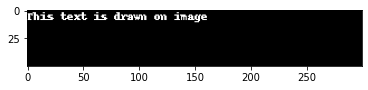

In [21]:
plt.imshow(image)

In [16]:
neg = X[Y==0]
pos = X[Y==1]

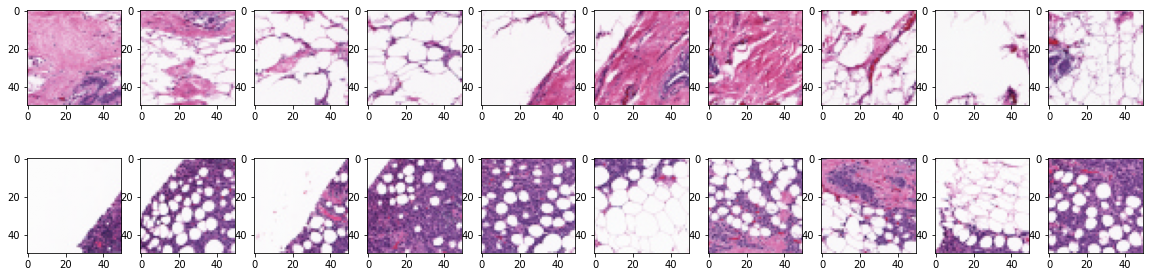

In [17]:
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(neg[i])
    plt.subplot(2, n, n + i + 1)
    plt.imshow(pos[i])


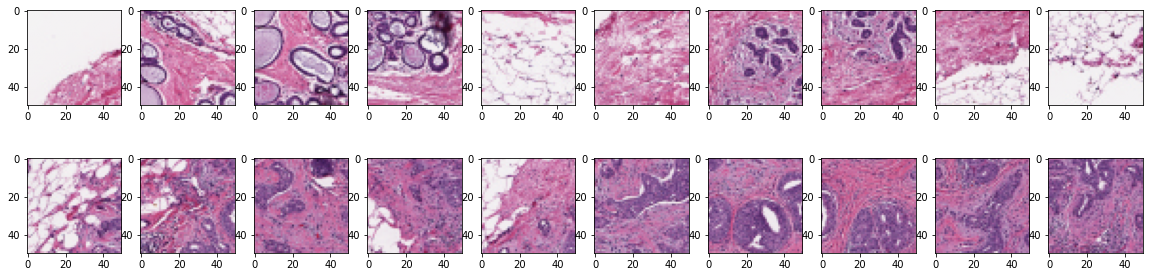

In [18]:
n=10
plt.figure(figsize=(20,5))
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(neg[i+80])
    plt.subplot(2,n,n+i+1)
    plt.imshow(pos[i+80])

In [106]:
X[0].dtype

dtype('uint8')

In [79]:
# one_pic = [[[rgb for rgb in row] for row in column] for column in X[0]]

In [239]:
bytes_image = base64.b64encode(X[0])

In [ ]:
url = 'http://127.0.0.1:8000/items/'
response = requests.post(url,data={'file':bytes_image})
                         
        

In [240]:
# piclist

url = 'http://127.0.0.1:8000/predict'
response = requests.post(url,data={'file':bytes_image})
                         
                        

In [236]:
# response.json()

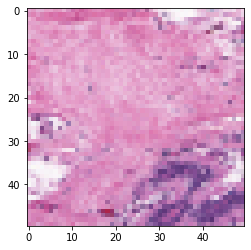

In [237]:
image_decoded = base64.b64decode(response.json())

long_array = np.frombuffer(image_decoded, dtype=np.uint8)
long_array.shape
image_as_array = np.reshape(long_array,(50,50,3))
plt.imshow(image_as_array)

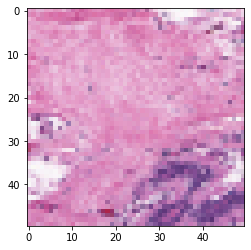

In [219]:
plt.imshow(X[0])

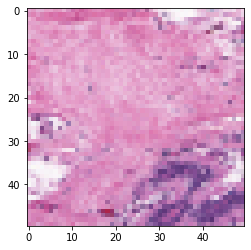

In [218]:
plt.imshow(image_as_array)


In [93]:
image = X[0:1]
image.shape

(1, 50, 50, 3)

In [ ]:
# Use PIL to create a byte stream to send an image through a post request to /items/
# Within fast.py, decode the bytestream to pass a numpy array to /predict
# how can /predict pull from /items/?


In [ ]:
json = {"picbytes": }

In [ ]:
url = 'http://127.0.0.1:8000/items/'
response = requests.post(url, json = json)